This notebook is the second part of a series showing some of my plots I came up with over time.

Especially for timeseries data [pandas](https://pandas.pydata.org/) excels. Together with matplotlib, HPLC chromatograms can be plotted in a very convenient way.

In a typical lab, data is commonly exported by a software in some sort of "user friendly" format. Let us assume we have a bunch of chromatograms stored as [time, rau] pairs in several sheets within one Excel file. Each sheet name corresponds to the sample name. Currently I do not have a dummy data generator for chromatograms, so this example will be a theoretical one.

In this example we will parse an Excel file using pandas and append the data to a dataframe. We will convert the time axis to a [timedelta](https://pandas.pydata.org/pandas-docs/stable/timedeltas.html) object and use the pandas magic to interpolate all chromatograms onto the same time axis.

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline
#plt.style.use('seaborn')

In [4]:
# the eluted samples
file = pd.ExcelFile('chrom.xlsx')

# the sheetnames of the samples
sheets = file.sheet_names

# container for storage
data = []
for sheet in sheets:
    
    # the file contains the signals. The sheet names contain the sample names: 1h, 2h etc
    # read specific sheet
    df = file.parse(sheet, header=None, index_col=None)
    # rename the columns
    df.columns=['rt', 'rau']

    # set retention time as index
    df.set_index('rt', inplace=True)

    # remove the measurements prior to injection
    dfi = df.iloc[df.index>=0,:]

    # convert the index to a timedelta object (given in minutes)
    dfi.index = pd.to_timedelta(dfi.index, unit='m')

    # rename the data column to include the sample information
    dfi.columns = ['{}'.format(sheet)]

    # append the dataframe to the list
    data.append(dfi)
        
# concatenate along the first axis
df = pd.concat(data, axis=1)

The data points of the chromatograms have not been measured at the same timepoints:

In [5]:
df.head(15)

,1h,2h,3h,4h,5h,6h
rt,,,,,,
00:00:00.060000,NaN,NaN,NaN,0.074387,NaN,NaN
00:00:00.150000,NaN,NaN,NaN,NaN,NaN,0.020504
00:00:00.169980,NaN,NaN,NaN,NaN,0.007629,NaN
00:00:00.190020,NaN,NaN,0.044346,NaN,NaN,NaN
00:00:00.240000,0.009537,NaN,NaN,NaN,NaN,NaN
00:00:00.300000,NaN,0.011444,NaN,NaN,NaN,NaN
00:00:00.460020,NaN,NaN,NaN,0.077248,NaN,NaN
00:00:00.550020,NaN,NaN,NaN,NaN,NaN,0.019550
00:00:00.570000,NaN,NaN,NaN,NaN,0.010490,NaN


Luckily it is very easy to interpolate the columns on the same time axis:

In [6]:
df = df.interpolate()
df.head(10)

,1h,2h,3h,4h,5h,6h
rt,,,,,,
00:00:00.060000,NaN,NaN,NaN,0.074387,NaN,NaN
00:00:00.150000,NaN,NaN,NaN,0.074863,NaN,0.020504
00:00:00.169980,NaN,NaN,NaN,0.075340,0.007629,0.020345
00:00:00.190020,NaN,NaN,0.044346,0.075817,0.008106,0.020186
00:00:00.240000,0.009537,NaN,0.044346,0.076294,0.008583,0.020027
00:00:00.300000,0.009378,0.011444,0.044346,0.076771,0.009060,0.019868
00:00:00.460020,0.009219,0.011841,0.044346,0.077248,0.009537,0.019709
00:00:00.550020,0.009060,0.012239,0.044346,0.077724,0.010014,0.019550
00:00:00.570000,0.008901,0.012636,0.044346,0.078201,0.010490,0.019312


The time delta index allows for convenient indexing

Text(0.5,0,'Retention time (min)')

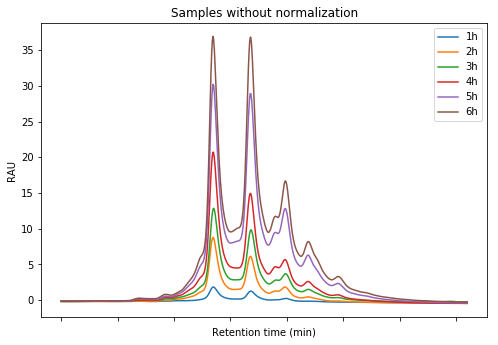

In [9]:
# the peaks elute between 4 and 8 minutes
fig, ax = plt.subplots(ncols=1, figsize=(8,6))
mask = (df.index >= '00:04:00.0') & (df.index <= '00:08:00.0')
df[mask].plot(ax=ax)
plt.title('Samples without normalization')
plt.ylabel('RAU')
plt.xlabel('Retention time (min)')

A plot of the normalized chromatograms shows a change in peak pattern over time:

Text(0.5,0,'Retention time (min)')

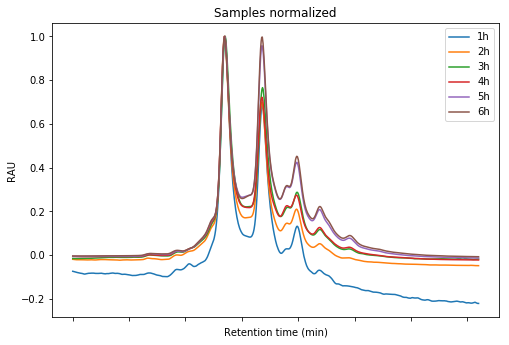

In [10]:
# the peaks elute between 4 and 8 minutes
mask = (df.index >= '00:04:00.0') & (df.index <= '00:08:00.0')

# normalization is a onliner
dfn = df[mask]/df[mask].max()

fig, ax = plt.subplots(ncols=1, figsize=(8,6))
dfn.plot(ax=ax)

plt.title('Samples normalized')
plt.ylabel('RAU')
plt.xlabel('Retention time (min)')